In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [62]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv(r'C:\Users\tanus\Downloads\Book1.csv')

In [63]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [64]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [65]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [66]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [67]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [68]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [69]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [70]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [71]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [72]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [73]:
legit_sample = legit.sample(n=492)

In [74]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [75]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279143,168675.0,-0.108824,0.804933,-0.217625,-0.390290,1.081269,-0.496433,1.040925,-0.147189,-0.143801,...,0.138461,0.581892,-0.281692,0.602962,0.256409,0.671596,-0.003386,0.055453,29.61,0
119972,75656.0,-1.787486,1.855217,0.610228,-0.117842,-0.324672,-0.710006,0.525730,0.156552,-0.085025,...,0.155204,0.599175,0.012689,0.446570,-0.363161,0.205288,-0.779826,-0.291972,18.09,0
8775,11952.0,-3.907663,-2.904837,2.343159,2.773750,2.414491,-1.614892,-0.972506,0.172154,1.165976,...,-0.139717,0.770831,2.645418,0.297958,0.404115,-0.036031,0.578623,0.055250,1.52,0
169046,119498.0,-0.929059,1.044982,-0.191003,-0.752825,0.828851,-0.677636,0.606708,0.408509,-0.377548,...,-0.100695,-0.371971,-0.267215,-0.612350,0.138882,-0.079254,-0.019334,0.045907,20.00,0
15197,26548.0,1.028525,-0.111386,1.267606,1.053150,-0.845279,0.224685,-0.683238,0.309320,0.308706,...,0.207610,0.577739,0.011902,0.208988,0.201874,-0.376959,0.071098,0.032889,32.22,0


In [76]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [77]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [78]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
279143  168675.0 -0.108824  0.804933 -0.217625 -0.390290  1.081269 -0.496433   
119972   75656.0 -1.787486  1.855217  0.610228 -0.117842 -0.324672 -0.710006   
8775     11952.0 -3.907663 -2.904837  2.343159  2.773750  2.414491 -1.614892   
169046  119498.0 -0.929059  1.044982 -0.191003 -0.752825  0.828851 -0.677636   
15197    26548.0  1.028525 -0.111386  1.267606  1.053150 -0.845279  0.224685   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [79]:
print(Y)

279143    0
119972    0
8775      0
169046    0
15197     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [81]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [82]:
# Models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=5000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=2),
    "SVM": SVC(kernel='linear')
}


In [83]:
# Accuracy storage
accuracies = {}


In [84]:
# Train and test all models
for name, model in models.items():
    model.fit(X_train, Y_train)
    predictions = model.predict(X_train)
    training_data_accuracy = accuracy_score(predictions, Y_train)
    print(f'Accuracy on Training data ({name}) : {training_data_accuracy:.4f}')
    
    test_predictions = model.predict(X_test)
    test_data_accuracy = accuracy_score(test_predictions, Y_test)
    print(f'Accuracy on Test data ({name}) : {test_data_accuracy:.4f}')
    
    accuracies[name] = test_data_accuracy

Accuracy on Training data (Logistic Regression) : 0.9390
Accuracy on Test data (Logistic Regression) : 0.9137
Accuracy on Training data (Random Forest) : 1.0000
Accuracy on Test data (Random Forest) : 0.9289
Accuracy on Training data (SVM) : 0.9009
Accuracy on Test data (SVM) : 0.9036


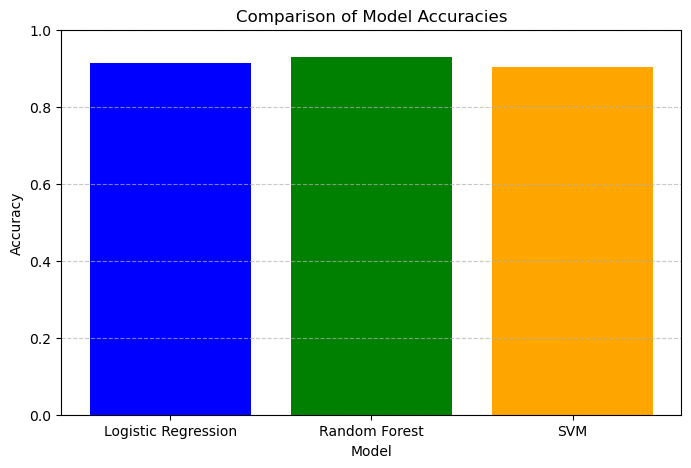

In [85]:
# Plotting graph
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.title("Comparison of Model Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

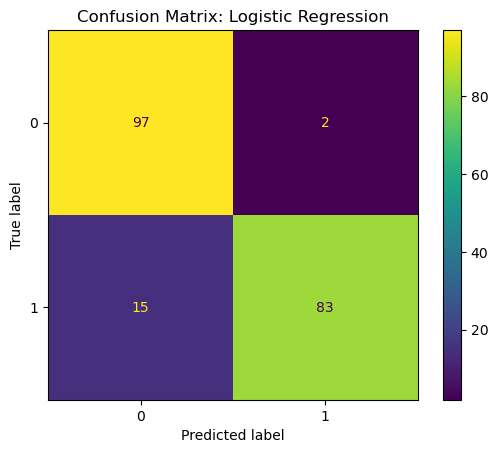

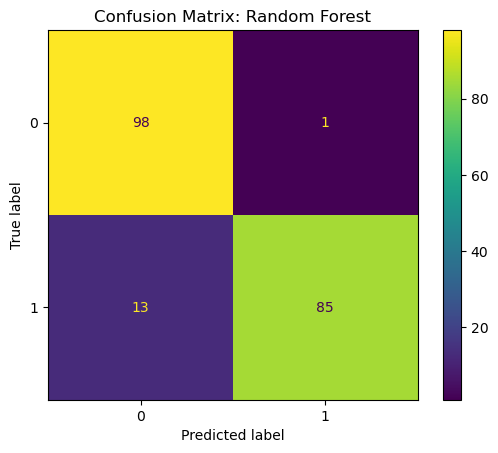

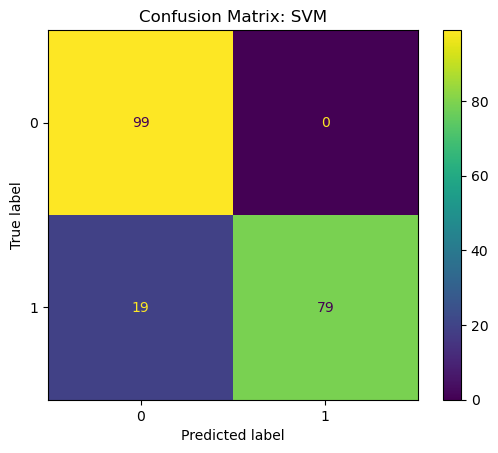

In [86]:
#Confusion Matrix:Shows the count of true positives, true negatives, false positives, and false negatives.
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)
    plt.title(f'Confusion Matrix: {name}')
    plt.grid(False)
    plt.show()


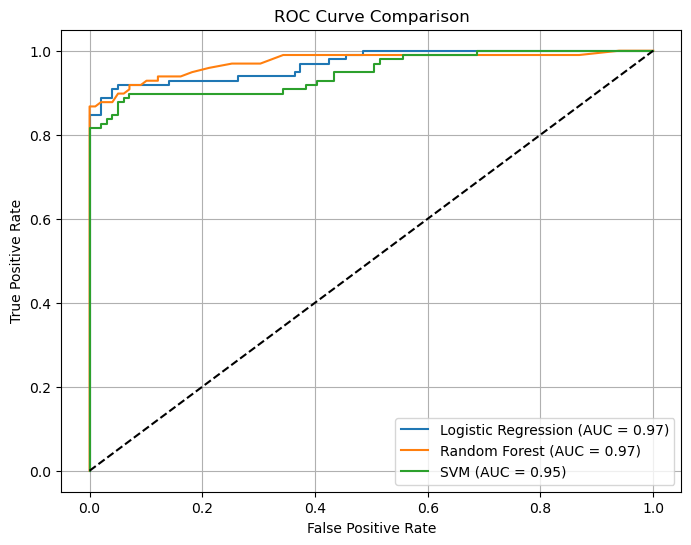

In [87]:
#ROC Curve (Receiver Operating Characteristic):Visualizes true positive rate vs. false positive rate.
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


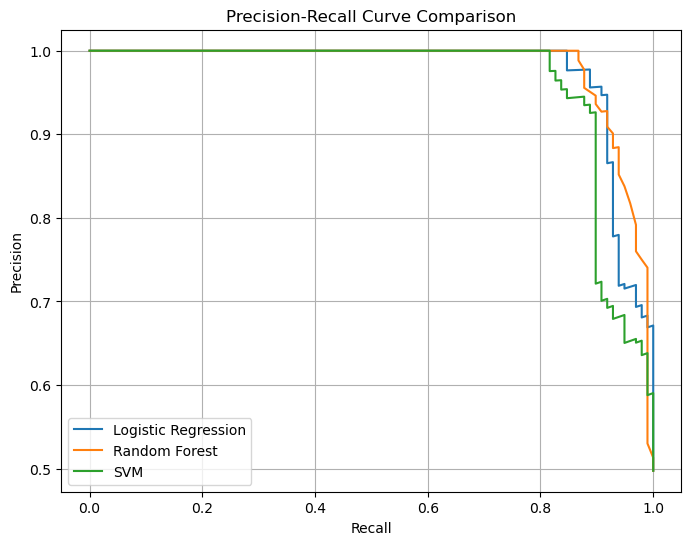

In [88]:
#Precision-Recall Curve:Especially useful in imbalanced datasets.
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(Y_test, y_score)
    plt.plot(recall, precision, label=f'{name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


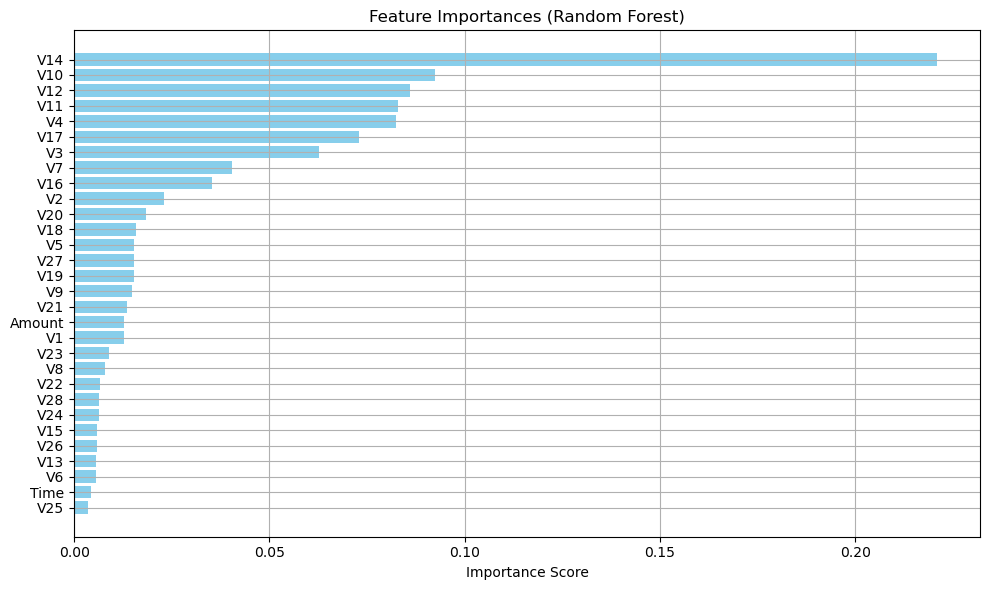

In [89]:
#Feature Importance (for Random Forest):Shows which features are most influential.
importances = models["Random Forest"].feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.grid(True)
plt.tight_layout()
plt.show()


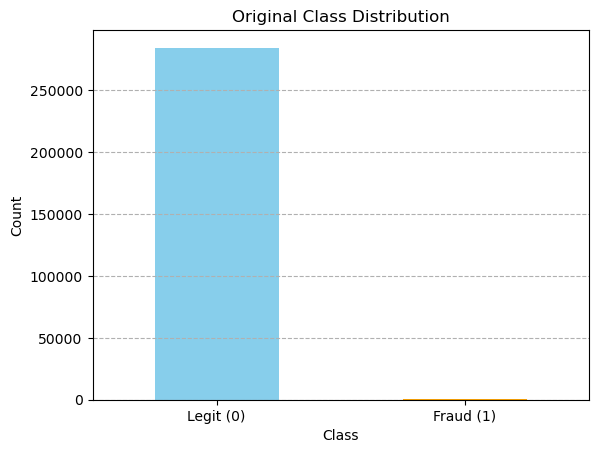

In [90]:
#Class Distribution Bar Plot:Visualize class imbalance in your original data.
credit_card_data['Class'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.xticks([0, 1], ['Legit (0)', 'Fraud (1)'], rotation=0)
plt.title('Original Class Distribution')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')
plt.show()
